In [38]:
import os
import re
import sys
import gc
import unicodedata

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

from bs4 import BeautifulSoup

# Mecab 형태소 분석기
from konlpy.tag import Mecab 

# pands option
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# numpy option :  array출력 시 생략 하지 않고 출력
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# 주피터 노트북 메모리 늘리기
# 주피터 노트북 -> New -> terminal 열고 아래 command 입력
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# C:\Users\iamsu\.jupyter\jupyter_notebook_config.py
# c.NotebookApp.iopub_data_rate_limit = 1.0e10 comment out
# restart 

import warnings
warnings.filterwarnings('ignore')

# 파일 핸들링

In [2]:
def get_dataframe(dirpath,filename):
    """
    csv 파일을 읽어서 DataFrame을 반환하는 함수
    """
    df = pd.read_csv(dirpath+filename)
    df = df.drop(['Unnamed: 0'], axis = 1)
    return df

def get_filename(filepath):
    """
    csv 파일의 확장자를 제거한 파일 이름만 반환하는 함수
    """
    return filepath.split('.')[0]

def get_review_list(df):
    """
    df['Review'] 열을 문장단위의 리스트로 저장하여 반환하는 함수
    """
    return df['Review'].values

def write_text_file_as_list(dirpath, filename, review_list):
    """
    List 의 각 요소를 text file 에 한줄씩 쓰기
    """
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
    filepath = filename + '_list.txt'
    f = open(dirpath + filepath, 'w')
    f.write('\n'.join(review_list))
    f.close()
    
def write_text_file_as_str(dirpath, filename, data):
    """
    text file 에 string 형태로 쓰기
    """
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
    filepath = filename + '_list.txt'
    f = open(dirpath + filepath, 'w')
    f.write(data)
    f.close()    
    
def read_text_file_as_list(dirpath, filename):
    """
    List 의 각 요소를 한줄씩 읽기
    """  
    filepath = filename + '_list.txt'
    with open(dirpath + filepath, 'r') as f:
        readList = f.readlines()
    return readList
  
def read_text_file_as_str(dirpath, filename):
    """
    하나의 string으로 읽기
    """      
    filepath = filename + '_list.txt'
    with open(dirpath + filepath, 'r') as f:
        review_str = f.read()# f.read().replace('\n', ' ')
    return review_str

# 1. 데이터 읽어오기

In [ ]:
RAW_DATA_DIR = '../크롤링/data/kr/'
DATA_DIR = './data/'  # /자연어 처리/data
filepath = "kr_전지적 독자 시점_episode_total.csv"
df = get_dataframe(RAW_DATA_DIR, filepath)
df.head()

# 2. 파일명 얻어오기

In [ ]:
filename = get_filename(filepath)
filename

# 3. df['Review'] 열을 문장단위의 리스트로 저장하기

In [ ]:
review_list = get_review_list(df)

# 4. 댓글을 리스트 형태로 txt파일에 쓰기
- List 의 각 요소를 text file 에 한줄씩 쓰기

In [ ]:
DATA_DIR = './data/' # /자연어 처리/data
write_text_file_as_list(DATA_DIR, get_filename(filepath), review_list)

# 5. txt파일을 리스트 형태로 읽어오기

In [ ]:
review_list = read_text_file_as_list(DATA_DIR, get_filename(filepath))
review_list[:10]                        

# 6. txt파일을 String 형태로 읽어오기(\n)

In [ ]:
review_str = read_text_file_as_str(DATA_DIR, get_filename(filepath))
review_str[:100]   

# 행단위 한국어 전처리
- 라인 단위 for루프 처리는 성능 저하
- '\n'유지한채로 for루프 없이 성능향상

In [3]:
def clean_list(review_str):
    document = review_str
    
    # 1. 크롤링한 데이터이므로 HTML TAG 제거
    doc = BeautifulSoup(document, 'html.parser').get_text()

    # 2. 한글만 추출( 구둣점, 이모티콘 자동 제거됨) \n유지
    doc = re.sub("[^ ㄱ-ㅣㅣ가-힣\n]+", '', doc)

    # 3. ㄹㅇㅜㅜ 처럼 모음이나 자음만으로 이루어진 글자 제거
    doc = re.sub('[ㄱ-ㅣ]+','',doc)

    #4. 구두점 삭제
    # 구두점 문자로 이루어진 딕셔너리를 생성
    punctuation = dict.fromkeys( i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
    doc = doc.translate(punctuation)

    # 5. (흐어어어어어어어어어어어어어어어어어어) 반복어 삭제
    doc = re.sub('(([[ㄱ-ㅣ가-힣0-9\n])\\2{1,})','', doc)
    
    return doc

In [4]:
review_list[:10]

NameError: name 'review_list' is not defined

In [ ]:
del df # 메모리 확보
del review_list
gc.collect()
cleaned_doc = clean_list(review_str)
cleaned_doc[:1000]

In [ ]:
write_text_file_as_str(DATA_DIR, get_filename(filepath) + '_cleaned', cleaned_doc)

In [ ]:
del cleaned_doc

In [5]:
DATA_DIR = './data/'  # /자연어 처리/data
filepath = "kr_전지적 독자 시점_episode_total.csv"
doc = read_text_file_as_str(DATA_DIR, get_filename(filepath) + '_cleaned')
doc[:100]   

'전설이 시작된다\n전독시 소설은 안봤는데 이거 재밌움 웨툰은 일단 존잼\n나는유중혁이다\n소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요\n정주행'

In [6]:
cleaned_doc = clean_list(doc)
cleaned_doc[:1000]

'전설이 시작된다\n전독시 소설은 안봤는데 이거 재밌움 웨툰은 일단 존잼\n나는유중혁이다\n소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요\n정주행가는중\n전독시 웹툰  소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함하 사랑해 이번에는 너다\n작가님도 결말 알잖씀\n읽기 전 전독시 대댓글 보며 스포 안 당하는 법 대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다진짜 개꿀팀이에요 이것만 기억하면 기분 안망치고 즐감할수있음단 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당\n김독자못생긴설정아니엇나\n번째 정주행 시작\n화 넘는 소설이 몇년뒤엔 탄생할지도의 화산귀환\n오랜만에 정주행 할 사람\n재밌겠당\n소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중\n와 작화 뭐냐 대박이다\n평균 조회수가 라는건 주인공 말고 읽은 사람이 있다는거 아냐\n뿌잉뿌잉부엉부엉\n아진짜  네이버 후원기능 없나 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 \n정주행하시는분 \n전독시 미루고미루고미루다가 찍먹 시작\n막컷 무슨 장면임 소설 다 읽었는데 모르겠음\n정주행하는데 마지막컷 다 알것같네\n 실화냐 저거 \n그러니까 편이나 연재하신다는거죠\n설화 스포일러를 당한 자가 이야기를 시작합니다멸살법작가한수영 은밀한 모략가원작 유중혁유중혁 배후성가장오래된꿈김독자지금 유중혁은 회차가 아닌 기억잃은 회차\n안녕하세요 미래에서 왔습니다 전독시 진짜 재밌으니까 꼭 보게요\n아 기대된다\n전지적 독자 시점이 웹툰화된지 벌써 년이 다 되가네요웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재미있던 소설이었습니다 전독시를 읽을 때 항상 울고 웃던 기억이 생각나네요지금 몇번째 정주행 

In [47]:
# Okt를 이용하여 토큰화 - 너무 느림
# from konlpy.tag import Okt
# okt = Okt()

# word_tokens = okt.morphs(document5)
# word_tokens[:100]

# 1. mecab 을 이용하여 토큰화(nlp activate)

In [48]:
# %timeit으로 jupyter notebook에서 Cell 단위 코드 수행 시간 확인하기

In [ ]:
# %%time
#from konlpy.tag import Mecab 제대로 동작 안 함
from eunjeon import Mecab  # konlpy 대신  eunjeon 패키지 사용

mecab = Mecab()
word_tokens = mecab.morphs(cleaned_doc)

In [ ]:
print(word_tokens[:1000])

# 2. 한국어 불용어 만들기(list)

In [ ]:
def make_stop_words():
    f = open("./불용어 사전 파일/stopwords_ko.txt", 'r')
    lines = f.readlines()
    f.close()
    
    stop_words = []
    for line in lines:
        line = line.replace('\n', '')
        stop_words.append(line)
    return stop_words
    
stop_words = make_stop_words()
stop_words[:10]

# 3. 정제 - 한국어 불용어 제거

In [ ]:
def remove_stop_words(word_tokens):
    vocab={}
    sentences = []
    result = []

    for word in word_tokens: 
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 1: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1
    sentences.append(result)
    
    return vocab

vocab = remove_stop_words(word_tokens)
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
vocab_sorted[:10]

In [22]:
keyword = [word[0] for word in vocab_sorted]
"""
keyword = []
for i in range(len(narray)):
    keyword.append(narray[i][0])
keyword[:10]
"""
keyword[:10]

['독자', '소설', '웹툰', '유중', '작가', '사람', '독시', '비형', '생각', '성좌']

In [23]:
frequency = [word[1] for word in vocab_sorted]
frequency[:10]

[110657, 53579, 32402, 30091, 28064, 23218, 19040, 18296, 18251, 14471]

In [26]:
import os

DATA_DIR = './data/'  # /자연어 처리/data
filepath = "kr_전지적 독자 시점_episode_total.csv"
filename = get_filename(filepath)

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)
filepath = filename + '_keyword_kr.txt'
f = open(DATA_DIR + filepath, 'w')
f.write(','.join(keyword))
f.close()

In [27]:
import numpy
keyword_frequency = numpy.array(vocab_sorted)
keyword_frequency[:10]

array([['독자', '110657'],
       ['소설', '53579'],
       ['웹툰', '32402'],
       ['유중', '30091'],
       ['작가', '28064'],
       ['사람', '23218'],
       ['독시', '19040'],
       ['비형', '18296'],
       ['생각', '18251'],
       ['성좌', '14471']], dtype='<U25')

In [29]:
import os

DATA_DIR = './data/'  # /자연어 처리/data
filepath = "kr_전지적 독자 시점_episode_total.csv"
filename = get_filename(filepath)

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)
filepath = filename + '_keyword_frequency_kr.txt'
f = open(DATA_DIR + filepath, 'w')
f.write(np.array2string(keyword_frequency))
f.close()

# 워드클라우드 시각화

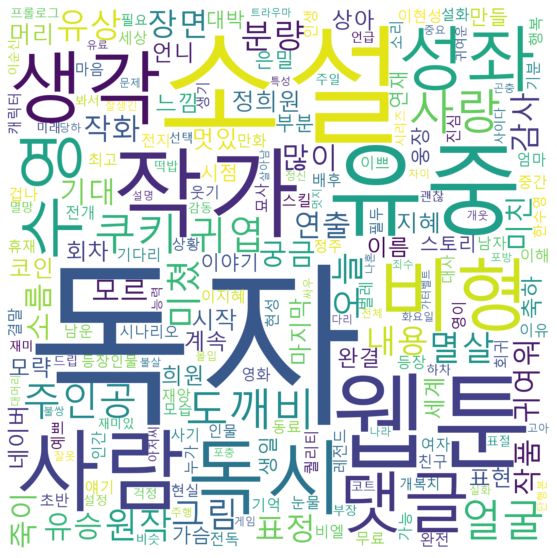

In [18]:
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun', background_color='white',     width = 800, height = 800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(vocab)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("top10_한글.png")

# 시각화를 위해서 데이터 프레임으로 생성(keyword, freq)

In [32]:
# df = pd.DataFrame([keyword,frequency])
# df

In [35]:
df = pd.DataFrame(zip(keyword,frequency))
df.columns = ['keyword','frequency']
df = df.set_index(keys= 'keyword', drop=True)
df

,frequency
keyword,
독자,110657
소설,53579
웹툰,32402
유중,30091
작가,28064
...,...
괞을듯,1
뻐억이어진,1
뻐억마치,1


In [41]:
top10 = df[:10].sort_values(by='frequency',ascending=True)
top10

,frequency
keyword,
성좌,14471
생각,18251
비형,18296
독시,19040
사람,23218
작가,28064
유중,30091
웹툰,32402
소설,53579


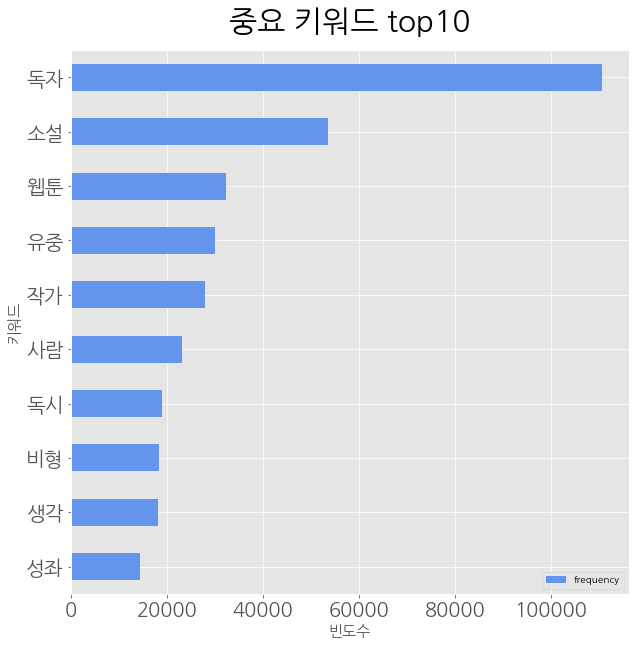

In [40]:
top10.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,10),fontsize=20 )
plt.style.use('ggplot')
plt.title('중요 키워드 top10', fontsize=30 , loc ='center', pad=20)
# plt.legend(loc='best')
plt.xlabel('빈도수', size = 15)
plt.ylabel('키워드', size = 15)
plt.show()

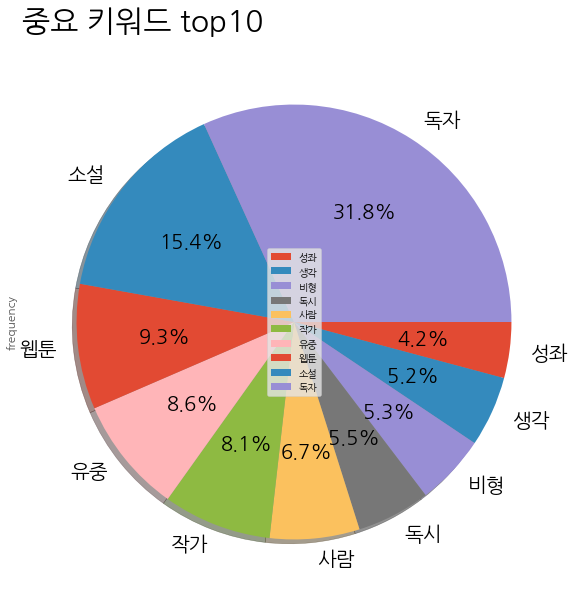

In [42]:
top10_pie = top10['frequency']
top10_pie.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', startangle=0, counterclock=False, shadow=True, fontsize=20) # , colors=['chocolate', 'bisque','cadetblue'] colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.title('중요 키워드 top10', fontsize=30 , loc ='left', pad=20)
plt.legend(loc=10)
plt.show()

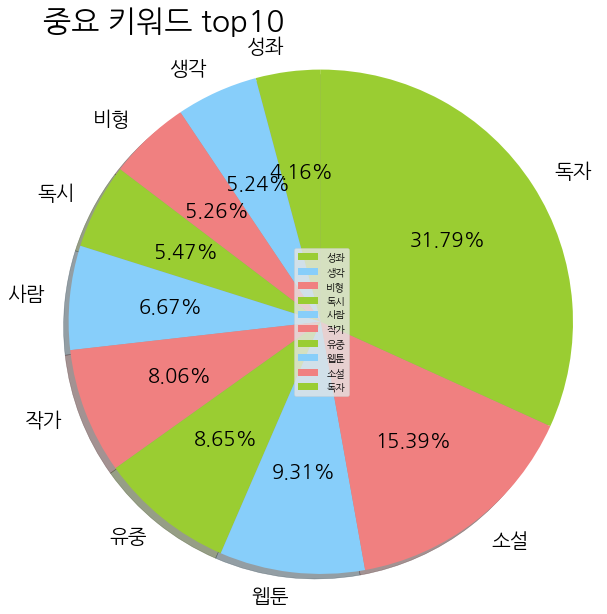

In [45]:
ratio = top10['frequency'].values
labels = top10.index.to_list()
labels

# information of groups
group_names = top10.index.to_list()
group_sizes = top10['frequency'].values
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
group_explodes = (0.1, 0, 0) # explode 1st slice

# plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False,  shadow=True, colors=colors)
# plt.show()

# # Pie chart
plt.figure(figsize = (10,10))
plt.pie(group_sizes, 
#         explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 20}) # text font size
plt.axis('equal') #  equal length of X and Y axis
plt.title('중요 키워드 top10', fontsize=30 , loc ='left', pad=20)
plt.legend(loc=10)
plt.show()

# Mecab 설치

In [ ]:
"""
https://doitgrow.com/m/39
https://wonhwa.tistory.com/m/49

conda create --name nlp python=3.7 anaconda

conda activate nlp

# Jpype 프로그램을 자동 설치
pip install konlpy

pip install tweepy==3.10.0

주피터 노트북에 가상환경 등록하기
pip install ipykernel

python -m ipykernel install --user --name nlp --display-name "nlp"

jupyter notebook

new file -> nlp

pip install -v python-mecab-ko

https://christinarok.github.io/2021/04/08/mecab.html

https://velog.io/@jyong0719/konlpy-mecab-%EC%84%A4%EC%B9%98-window

mecab-python
git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
cd mecab-python-0.996/
python3 setup.py build
python3 setup.py install

pip install -v python-mecab-ko

pip install  JPype1‑0.7.5‑cp38‑cp37‑win_amd64.whl

https://iostream.tistory.com/m/144
한국어 형태소 분석기 성능 비교
연산 속도가 중요하다면 mecab을 최우선으로 고려해야하며, 심지어 분석 품질도 상위권으로 보여짐

https://vhrehfdl.tistory.com/m/147
python 3.8 버전에서는 현재 지원을 하지 않는다. 그래서 부득이하게 python 3.7 버전으로 downgrade 한 후 작동시켰다.


https://uwgdqo.tistory.com/m/363
Mecab 설치방법

https://velog.io/@kjyeon1101/%ED%8A%B8%EC%9C%84%ED%84%B0-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EC%A0%95%EC%A0%9C%ED%95%98%EA%B3%A0-%EC%BB%A4%EC%8A%A4%ED%85%80-%EC%82%AC%EC%A0%84-%EB%93%B1%EB%A1%9D%ED%95%B4%EC%84%9C-%ED%98%95%ED%83%9C%EC%86%8C%EB%A1%9C-%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0
eunjeon Mecab 설치방법

https://joyhong.tistory.com/129
_Mecab.py 오류 수정
"""

# eunjeon Mecab examples

In [ ]:
from eunjeon import Mecab

mecab = Mecab()
mecab.pos("은전한닢 프로젝트에서 나온 mecab을 사용하는 중이다.")

In [ ]:
from eunjeon import Mecab

mecab = Mecab()
text = "싹쓰리가 이번에 싹 쓸어버리네."
a = mecab.pos(text)
print(a)
a = mecab.morphs(text)
print(a)

In [ ]:
from eunjeon import Mecab

mecab = Mecab()
mecab.pos("은전한닢 프로젝트에서 나온 mecab을 사용하는 중이다.")

In [ ]:
from eunjeon import Mecab

m = Mecab() # 사전 반영 X
text = "비타500 싹쓰리 미세먼지"
print("===================")
print(text)
print(m.pos(text))
print("===================")

In [ ]:
import MeCab
m = MeCab.Tagger()
a = m.parse("오늘은 좋은날, 행복한 삶을 누리자.")
print(a)

In [ ]:
from eunjeon import Mecab

m = Mecab(dicpath='C:/mecab/mecab-ko-dic') # 사전 반영 O
text = "비타500 싹쓰리 미세먼지"
print("===================")
print(text)
print(m.pos(text))
print("===================")

In [ ]:
from eunjeon import Mecab

mecab = Mecab(dicpath='C:/mecab/mecab-ko-dic')
text = "싹쓰리가 이번에 싹 쓸어버리네."
a = mecab.pos(text)
print(a)
a = mecab.morphs(text)
print(a)